# Andrew Hennis BINF 760 Homework 2

## Gaussian Naive Bayes and Logistic Regression for micropeptide prediction

At the top of my file, I'm importing all of my necessary packages;

- biobase to covert the dna sequence to an amino acid sequence
- pandas to import the csv and for dataframes
- matplotlib to display the ROC plot
- scikitlearn
  - Logistic regression model and Naive Bayes model
  - Accuracy, Precision, and Recall Score
  - generate ROC plot
  - creation of training and test data

In [ ]:
!pip install biobase

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from biobase.analysis import Dna
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

Since the models are predicting whether or not a sequence is a micropeptide, the first step is to change the labels so that there is a binary choice between either having a micropeptide label or not having a micropeptide label

In [ ]:
df = pd.read_csv('sORFs.csv')
df['is_micropeptide'] = df['label'].apply(lambda x: True if x == 'micropeptide' else False)
df.head()

,sequence,label,is_micropeptide
0,ATGGGCGTCTTACCAGACATGGTTAGACCTGGCCCTCTGTCTAATA...,miRNA,False
1,ATGAGCTGGCAGTGTATTGTTAGCTGGTTGAATATGTGA,miRNA,False
2,ATGGCTGGTGGGCCCTGA,miRNA,False
3,ATGGATGGTCGACCAGTTGGAAAGTAA,miRNA,False
4,ATGGTCGACCAGTTGGAAAGTAATTGTTTCTAA,miRNA,False


Now, I'm adding the three independent variables to the dataframe
1. Number of distinct nucleotides
2. Number of distinct codons
3. Number of distinct amino acids

I'm getting the distinct nucleotides by putting each sequence string into a set, which removes duplicate characters.

I'm getting the distinct codons by iterating through the sequence three characters at a time using a list comprehension which also uses a set to remove duplicate triplets.

I'm getting distinct amino acids by using the translate function imported from the biobase package and taking the first element of a list divided by the word "STOP" (which removes the stop codon from my final amino acid list) and I put this collection of amino acids into a set which removes duplicates.

In [ ]:
df['distinct_nucleotides'] = df['sequence'].apply(lambda x: len(set(x)))
df['distinct_codons'] = df['sequence'].apply(lambda x: len(set([x[i:i+3] for i in range(0, len(x), 3)])))
df['distinct_amino_acids'] = df['sequence'].apply(lambda x: len(set(Dna.translate(x).split("STOP")[0])))
df

,sequence,label,is_micropeptide,distinct_nucleotides,distinct_codons,distinct_amino_acids
0,ATGGGCGTCTTACCAGACATGGTTAGACCTGGCCCTCTGTCTAATA...,miRNA,False,4,15,11
1,ATGAGCTGGCAGTGTATTGTTAGCTGGTTGAATATGTGA,miRNA,False,4,10,9
2,ATGGCTGGTGGGCCCTGA,miRNA,False,4,6,4
3,ATGGATGGTCGACCAGTTGGAAAGTAA,miRNA,False,4,9,7
4,ATGGTCGACCAGTTGGAAAGTAATTGTTTCTAA,miRNA,False,4,11,10
...,...,...,...,...,...,...
6948,ATGCAGGACTGCCAGCGGGAGCTCCAGAGCCTGCTGGTGGAGGAGG...,micropeptide,True,4,28,18
6949,ATGATGTCCGCTCTGATGTCTGGAGTTTGGGGATCACATTGCCTTA...,micropeptide,True,4,35,19
6950,ATGTCACACGGGTGTCTGAAGGAGGCCCTGCTGAAATCGCTGGGCT...,micropeptide,True,4,18,11
6951,ATGATAAAAATTTCGACGATGAAGATTCTGTGGATGGTAACAGACC...,micropeptide,True,4,36,17


In [ ]:
X_nuc = df[['distinct_nucleotides']]
X_cod = df[['distinct_codons']]
X_aa = df[['distinct_amino_acids']]
y = df['is_micropeptide']

### Train and Test data

Here, I am splitting data into 80% training data and 20% testing data by each independent variable.

In [ ]:
X_nuc_train, X_nuc_test, y_nuc_train, y_nuc_test = train_test_split(X_nuc, y, test_size=0.2, shuffle=True)
X_cod_train, X_cod_test, y_cod_train, y_cod_test = train_test_split(X_cod, y, test_size=0.2, shuffle=True)
X_aa_train, X_aa_test, y_aa_train, y_aa_test = train_test_split(X_aa, y, test_size=0.2, shuffle=True)

### Model

The following two blocks of code instantiate a model (one per independent variable per classification function), fit the model on the appropriate training data, and use the fitted model to predict if the data in the test group is a micropeptide or not.

In [ ]:
# Gaussian Naive Bayes
model_nuc_NB = GaussianNB()
model_nuc_NB.fit(X_nuc_train, y_nuc_train)
y_nuc_pred_NB = model_nuc_NB.predict(X_nuc_test)

model_cod_NB = GaussianNB()
model_cod_NB.fit(X_cod_train, y_cod_train)
y_cod_pred_NB = model_cod_NB.predict(X_cod_test)

model_aa_NB = GaussianNB()
model_aa_NB.fit(X_aa_train, y_aa_train)
y_aa_pred_NB = model_aa_NB.predict(X_aa_test)

In [ ]:
# Logistic Regression
model_nuc_LR = LogisticRegression()
model_nuc_LR.fit(X_nuc_train, y_nuc_train)
y_nuc_pred_LR = model_nuc_LR.predict(X_nuc_test)

model_cod_LR = LogisticRegression()
model_cod_LR.fit(X_cod_train, y_cod_train)
y_cod_pred_LR = model_cod_LR.predict(X_cod_test)

model_aa_LR = LogisticRegression()
model_aa_LR.fit(X_aa_train, y_aa_train)
y_aa_pred_LR = model_aa_LR.predict(X_aa_test)

### Results

Using the `accuracy_score`, `precision_score`, and `recall_score` functions from the sklearn.metrics modules, the following to code blocks calculates the accuracy, precision, and recall respecitively for each independent variable in each classification algorithm.

In [ ]:
print("Distinct Nucleotide Count Naive Bayes")
print(f"Accuracy: {metrics.accuracy_score(y_nuc_test, y_nuc_pred_NB)}")
print(f"Precision: {metrics.precision_score(y_nuc_test, y_nuc_pred_NB)}")
print(f"Recall: {metrics.recall_score(y_nuc_test, y_nuc_pred_NB)}\n")

print("Distinct Codon Count Naive Bayes")
print(f"Accuracy: {metrics.accuracy_score(y_cod_test, y_cod_pred_NB)}")
print(f"Precision: {metrics.precision_score(y_cod_test, y_cod_pred_NB)}")
print(f"Recall: {metrics.recall_score(y_cod_test, y_cod_pred_NB)}\n")

print("Distinct Amino Acid Count Naive Bayes")
print(f"Accuracy: {metrics.accuracy_score(y_aa_test, y_aa_pred_NB)}")
print(f"Precision: {metrics.precision_score(y_aa_test, y_aa_pred_NB)}")
print(f"Recall: {metrics.recall_score(y_aa_test, y_aa_pred_NB)}\n")


Distinct Nucleotide Count Naive Bayes
Accuracy: 0.5930984902947519
Precision: 0.5838235294117647
Recall: 1.0

Distinct Codon Count Naive Bayes
Accuracy: 0.9547088425593099
Precision: 0.9720101781170484
Recall: 0.9490683229813665

Distinct Amino Acid Count Naive Bayes
Accuracy: 0.9410496046010065
Precision: 0.9356376638855781
Recall: 0.965559655596556



In [ ]:
print("Distinct Nucleotide Count Logistic Regression")
print(f"Accuracy: {metrics.accuracy_score(y_nuc_test, y_nuc_pred_LR)}")
print(f"Precision: {metrics.precision_score(y_nuc_test, y_nuc_pred_LR)}")
print(f"Recall: {metrics.recall_score(y_nuc_test, y_nuc_pred_LR)}\n")

print("Distinct Codon Count Logistic Regression")
print(f"Accuracy: {metrics.accuracy_score(y_cod_test, y_cod_pred_LR)}")
print(f"Precision: {metrics.precision_score(y_cod_test, y_cod_pred_LR)}")
print(f"Recall: {metrics.recall_score(y_cod_test, y_cod_pred_LR)}\n")

print("Distinct Amino Acid Count Logistic Regression")
print(f"Accuracy: {metrics.accuracy_score(y_aa_test, y_aa_pred_LR)}")
print(f"Precision: {metrics.precision_score(y_aa_test, y_aa_pred_LR)}")
print(f"Recall: {metrics.recall_score(y_aa_test, y_aa_pred_LR)}")

Distinct Nucleotide Count Logistic Regression
Accuracy: 0.5930984902947519
Precision: 0.5838235294117647
Recall: 1.0

Distinct Codon Count Logistic Regression
Accuracy: 0.9547088425593099
Precision: 0.9720101781170484
Recall: 0.9490683229813665

Distinct Amino Acid Count Logistic Regression
Accuracy: 0.9410496046010065
Precision: 0.9356376638855781
Recall: 0.965559655596556


The following code blocks create a ROC curve plot and calculates the area under the curve for each indepedent variable for each classification algorithm.

#### Naive Bayes

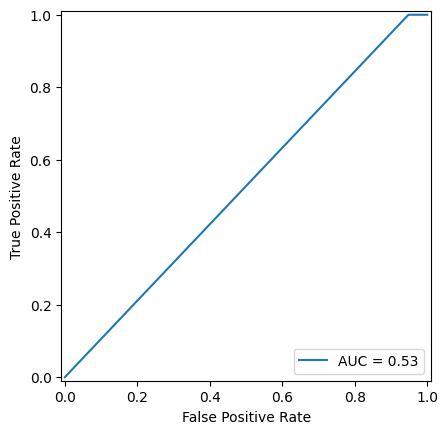

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_nuc_test, y_nuc_pred_NB)
roc_auc = metrics.auc(fpr, tpr)
display_nuc_NB = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display_nuc_NB.plot()
plt.show()

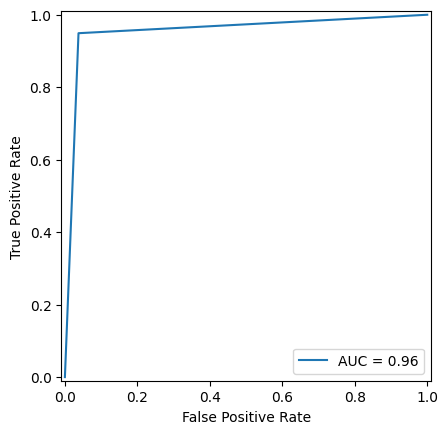

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_cod_test, y_cod_pred_NB)
roc_auc = metrics.auc(fpr, tpr)
display_cod_NB = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display_cod_NB.plot()
plt.show()

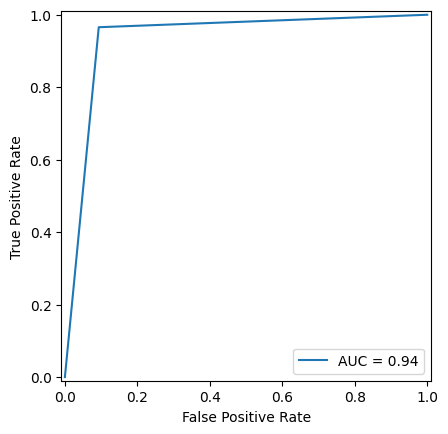

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_aa_test, y_aa_pred_NB)
roc_auc = metrics.auc(fpr, tpr)
display_aa_NB = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display_aa_NB.plot()
plt.show()

#### Logistic Regression

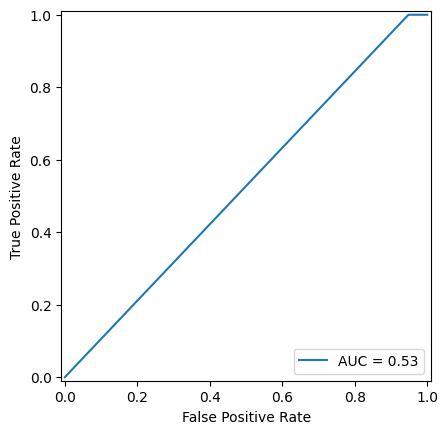

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_nuc_test, y_nuc_pred_LR)
roc_auc = metrics.auc(fpr, tpr)
display_nuc_LR = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display_nuc_LR.plot()
plt.show()

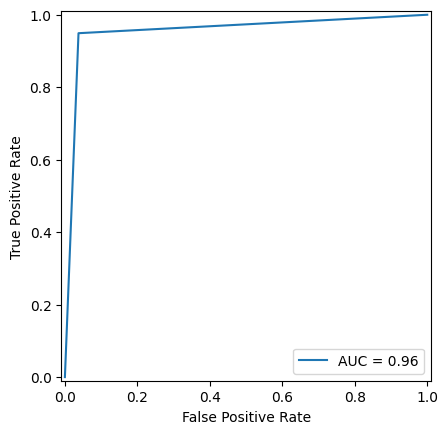

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_cod_test, y_cod_pred_LR)
roc_auc = metrics.auc(fpr, tpr)
display_cod_LR = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display_cod_LR.plot()
plt.show()

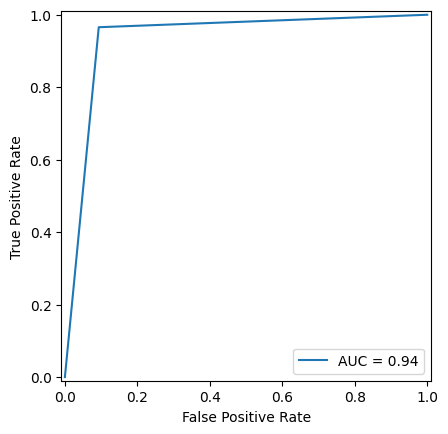

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_aa_test, y_aa_pred_LR)
roc_auc = metrics.auc(fpr, tpr)
display_aa_LR = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display_aa_LR.plot()
plt.show()

### Model Performance Evaluation Conclusion

Based on the precision scores, recall scores, accuracy score, and ROC curve plots, there is no real difference between using naive bayes and logistic regression for this data set when comparing values across indepdent variables.

Using distinct nucleotides is the worst method for predicting whether a sequence is a micropeptide, as most (if not all) sequences in the data have four nucleotides, thus making this method have a performance equivalent to random chance. This method having a recall of 1.0 and a precision and accuracy close to 0.5 implies that this model predicts nearly every sequence as being a micropeptide.

Using distinct codons appears to be a better predictor than distinct amino acids. While the recall score is higher for distinct amino acids, meaning that it is better able to find all positives (ie has a lower false negative rate), it has a lower precision score, meaning that it is more likely to classify a negative sample as positive (ie has a higher false positive rate). This makes sense because multiple codons may code for the same amino acid, which means that on average there will be a greater range of values for samples based on their distinct codons compared to their distinct amino acids, which allows for higher precision.

#### Ranking of models

1. Distinct codon count
2. Distinct amino acid count
3. Distinct nucleotide count

Both NB and LR models performed identically when using the same independent variables.